<a href="https://colab.research.google.com/github/SherlynVironica/PSDS-Mahir-7.0/blob/main/CNN_MAMOGRAFI_FULL_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import itertools
import numpy as np

In [ ]:
path_source = '/content/drive/My Drive/Full prepro'

categories_in_path_x = os.listdir(path_source)
print(categories_in_path_x)

['Kanker', 'Normal']


In [ ]:
imgs = []
labels = []
list_data = []
data_single = []
for category in categories_in_path_x:
  list_img_name =  os.listdir(os.path.join(path_source,category))
  for img_name in list_img_name:
    img = cv2.imread(os.path.join(path_source,category,img_name))
    if category == 'Kanker':
       label = 0
    else:
      label = 1
    data_single = [img, label, img_name]
    list_data.append(data_single)
    imgs.append(img)
    labels.append(label)

arr_data = np.array(list_data)

In [ ]:
imgs = np.array(imgs)
np.shape(imgs)

(852, 256, 256, 3)

In [ ]:
print(labels)

from keras.utils import to_categorical
labels_binary = to_categorical(labels)

labels_binary

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

train_and_validation_x, test_x, train_and_validation_y_with_name, test_y_with_name = train_test_split(imgs, labels_binary, test_size=0.2, random_state=1)
train_x, validation_x, train_y_with_name, validation_y_with_name = train_test_split(train_and_validation_x, train_and_validation_y_with_name, test_size=0.2, random_state=1)

In [ ]:
train_x = np.array(train_x)
train_y_with_name =  np.array(train_y_with_name)
test_x = np.array(test_x)
test_y_with_name =  np.array(test_y_with_name)
validation_x = np.array(validation_x)
validation_y_with_name =  np.array(validation_y_with_name)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(544, 256, 256, 3)
(544, 2)
(171, 256, 256, 3)
(137, 256, 256, 3)


In [ ]:
train_x = train_x.reshape(-1, 256, 256, 1)
test_x = test_x.reshape(-1, 256, 256, 1)
validation_x = validation_x.reshape(-1, 256, 256, 1)
train_x = train_x / 255.0
train_y_with_name = train_y_with_name / 255.0
test_x = test_x / 255.0
validation_x = validation_x / 255.0

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(1632, 256, 256, 1)
(544, 2)
(513, 256, 256, 1)
(411, 256, 256, 1)


In [ ]:
train_x = train_x.reshape(-1, 256, 256, 3)
test_x = test_x.reshape(-1, 256, 256, 3)
validation_x = validation_x.reshape(-1, 256, 256, 3)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(544, 256, 256, 3)
(544, 2)
(171, 256, 256, 3)
(137, 256, 256, 3)


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/My Drive/CNNModel2/epochs:001-val_acc:0.835.h5")

In [ ]:
# set learning rate, epochs and batch size
# INIT_LR = 1e-5    # This value is specific to what model is chosen: Inception, VGG or ResNet etc.
EPOCHS = 20
BS = 8
# num_classes = 2

In [ ]:
# print("Compiling model...")
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Compiling model...


In [ ]:
# train the full model, since we unfroze the pre-trained weights above
print("Training the full stack model...")
breastcancer_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) // BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=EPOCHS)

Training the full stack model...
Epoch 1/20
68/68 [==============================] - 71s 1s/step - loss: 0.6933 - accuracy: 0.6783 - val_loss: 0.6920 - val_accuracy: 0.7440
Epoch 2/20
68/68 [==============================] - 69s 1s/step - loss: 0.6932 - accuracy: 0.6838 - val_loss: 0.6923 - val_accuracy: 0.7321
Epoch 3/20
68/68 [==============================] - 69s 1s/step - loss: 0.6932 - accuracy: 0.7022 - val_loss: 0.6924 - val_accuracy: 0.7500
Epoch 4/20
68/68 [==============================] - 69s 1s/step - loss: 0.6931 - accuracy: 0.7059 - val_loss: 0.6923 - val_accuracy: 0.7560
Epoch 5/20
68/68 [==============================] - 69s 1s/step - loss: 0.6931 - accuracy: 0.7151 - val_loss: 0.6923 - val_accuracy: 0.7619
Epoch 6/20
68/68 [==============================] - 70s 1s/step - loss: 0.6931 - accuracy: 0.6875 - val_loss: 0.6923 - val_accuracy: 0.7738
Epoch 7/20
68/68 [==============================] - 69s 1s/step - loss: 0.6932 - accuracy: 0.7243 - val_loss: 0.6920 - val_accu

Evaluating the trained model ...
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        99
           1       0.89      0.71      0.79        72

    accuracy                           0.84       171
   macro avg       0.86      0.82      0.83       171
weighted avg       0.85      0.84      0.84       171

[[93  6]
 [21 51]]


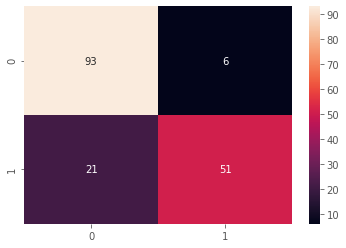

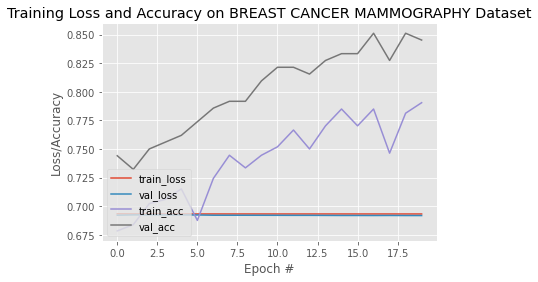

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

In [ ]:
model.save('/content/drive/My Drive/Model mamografi 84.h5')

In [ ]:
from keras.callbacks import *
filepath="/content/drive/My Drive/CNNModel3/epochs:{epoch:03d}-val_acc:{val_accuracy:.3f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train the full model, since we unfroze the pre-trained weights above
print("Training the full stack model...")
pneumonia_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) osob// BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=EPOCHS)

Training the full stack model...
Epoch 1/20
68/68 [==============================] - 71s 1s/step - loss: 0.6931 - accuracy: 0.7923 - val_loss: 0.6918 - val_accuracy: 0.8393
Epoch 2/20
68/68 [==============================] - 71s 1s/step - loss: 0.6931 - accuracy: 0.7886 - val_loss: 0.6917 - val_accuracy: 0.8393
Epoch 3/20
68/68 [==============================] - 70s 1s/step - loss: 0.6931 - accuracy: 0.8033 - val_loss: 0.6917 - val_accuracy: 0.8631
Epoch 4/20
68/68 [==============================] - 70s 1s/step - loss: 0.6931 - accuracy: 0.7831 - val_loss: 0.6916 - val_accuracy: 0.8750
Epoch 5/20
68/68 [==============================] - 70s 1s/step - loss: 0.6931 - accuracy: 0.7978 - val_loss: 0.6917 - val_accuracy: 0.8452
Epoch 6/20
68/68 [==============================] - 70s 1s/step - loss: 0.6931 - accuracy: 0.8088 - val_loss: 0.6916 - val_accuracy: 0.8690
Epoch 7/20
68/68 [==============================] - 71s 1s/step - loss: 0.6931 - accuracy: 0.7960 - val_loss: 0.6916 - val_accu

Evaluating the trained model ...
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        99
           1       0.93      0.78      0.85        72

    accuracy                           0.88       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.88      0.88       171

[[95  4]
 [16 56]]


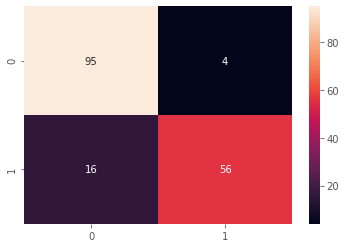

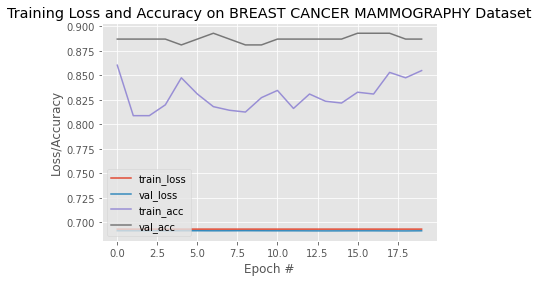

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

In [ ]:
# train the full model, since we unfroze the pre-trained weights above
print("Training the full stack model...")
pneumonia_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) // BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=17, callbacks=callbacks_list)

Training the full stack model...
Epoch 1/17
68/68 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8566
Epoch 00001: val_accuracy did not improve from 0.92857
68/68 [==============================] - 72s 1s/step - loss: 0.6931 - accuracy: 0.8566 - val_loss: 0.6912 - val_accuracy: 0.9107
Epoch 2/17
68/68 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8603
Epoch 00002: val_accuracy did not improve from 0.92857
68/68 [==============================] - 71s 1s/step - loss: 0.6931 - accuracy: 0.8603 - val_loss: 0.6912 - val_accuracy: 0.9226
Epoch 3/17
68/68 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8419
Epoch 00003: val_accuracy did not improve from 0.92857
68/68 [==============================] - 74s 1s/step - loss: 0.6931 - accuracy: 0.8419 - val_loss: 0.6912 - val_accuracy: 0.9286
Epoch 4/17
68/68 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8566
Epoch 00004: val_accuracy did not impro

Evaluating the trained model ...
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.94      0.88      0.91        72

    accuracy                           0.92       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

[[95  4]
 [ 9 63]]


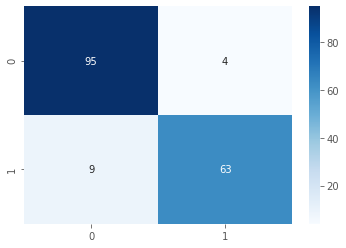

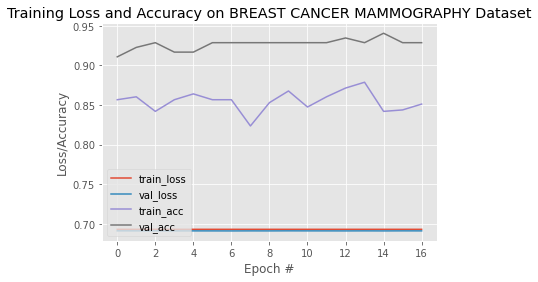

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 17
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./mammography/s-class-plot.png")

Evaluating the trained model ...
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.94      0.81      0.87        72

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.89      0.89       171

[[95  4]
 [14 58]]


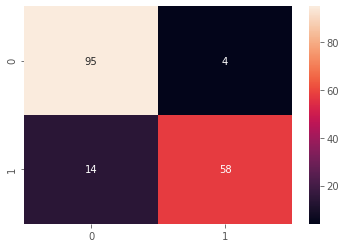

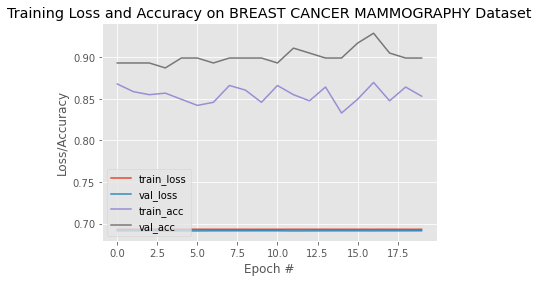

In [ ]:
imp
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

Evaluating the predict model ...
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        80
           1       0.98      0.88      0.93        57

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137

[[79  1]
 [ 7 50]]


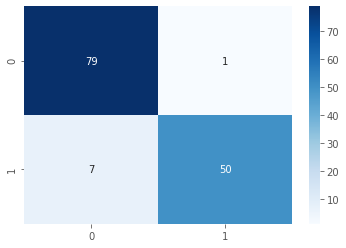

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the predict model ...")
predIdxs = model.predict(validation_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(validation_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(validation_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)

In [ ]:
print "HELLO REGINA"